In [8]:
#from fdcurves_manual visualization notebook
import numpy as np
import scipy as sc
from scipy import stats
import matplotlib.pyplot as plt
from lumicks import pylake
%matplotlib inline

#things i need
import glob
import re


In [47]:
dire='/mnt/e/Olivia files/LAB/PROJECTS/C-trap things/190906 ssDNA RPA-DBD/'
files = glob.glob(dire+'*FD*.h5')
for file_name in files:
    #print(file_name)
    file = pylake.File(file_name)
    #print(file)
    key = list(file.fdcurves.keys())[0]
    print(key,end =" ")

k1=input("which is pull? ")
k2=input("which is reverse? ")

for f in files:
    if re.search(r'\s' + k1+'\.',f):
        filename1=f
        print('opening1 '+filename1)
    if re.search(r'\s' + k2+'\.',f):
        filename2=f
        print('opening2 '+filename2)

file1 = pylake.File(filename1)
file2 = pylake.File(filename2)


5 18 19 20 which is pull? 18
which is reverse? 19
opening1 /mnt/e/Olivia files/LAB/PROJECTS/C-trap things/190906 ssDNA RPA-DBD/20190906-182227 FD Curve 18.h5
opening2 /mnt/e/Olivia files/LAB/PROJECTS/C-trap things/190906 ssDNA RPA-DBD/20190906-182229 FD Curve 19.h5


In [48]:
forcex = file1['Force HF']['Force 1x']
time = forcex.timestamps/1e9
time = time - time[0]
sample_rate = forcex.sample_rate
downsampled_rate = 100 # Hz
# downsample the force, nanostage position and time
forcex_downsamp = forcex.downsampled_by(int(sample_rate/downsampled_rate))
time_downsamp = forcex_downsamp.timestamps/1e9
time_downsamp = time_downsamp - time_downsamp[0]

tim1=time_downsamp
fxd1=forcex_downsamp.data

forcex = file2['Force HF']['Force 1x']
time = forcex.timestamps/1e9
time = time - time[0]
sample_rate = forcex.sample_rate
downsampled_rate = 100 # Hz
# downsample the force, nanostage position and time
forcex_downsamp = forcex.downsampled_by(int(sample_rate/downsampled_rate))
time_downsamp = forcex_downsamp.timestamps/1e9
time_downsamp = time_downsamp - time_downsamp[0]

tim2=time_downsamp
fxd2=forcex_downsamp.data

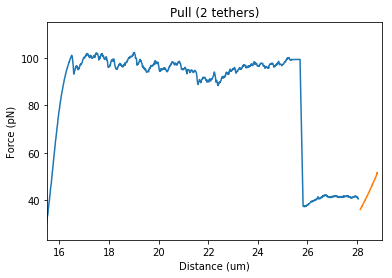

In [56]:
fcx1=file1['Force LF']['Force 1x']
dst1=file1['Distance']['Distance 1']
fcx2=file2['Force LF']['Force 1x']
dst2=file2['Distance']['Distance 1']

plt.figure()
plt.plot(dst1.data,fcx1.data,dst2.data,fcx2.data)
plt.xlim([15.5,29])
plt.xlabel('Distance (um)')
plt.ylabel('Force (pN)')
plt.title('Pull (2 tethers)')

plt.savefig(dire+'FDcurves'+k1+'-'+k2+'pull.png')

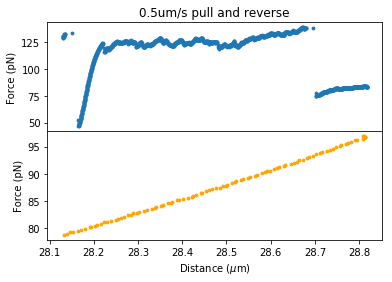

In [49]:
fd1=file1.fdcurves[k1]
fd2=file2.fdcurves[k2]
plt.figure()
plt.subplot(211)
fd1.plot_scatter()
plt.title('0.5um/s pull and reverse')
plt.subplot(212)
fd2.plot_scatter(color='orange')

# Remove horizontal space between axes
plt.subplots_adjust(hspace=0)
plt.title('')

#save
plt.savefig(dire+'FDcurves'+k1+'-'+k2+'.png')